In [1]:
import tensorflow as tf
from tensorflow import keras
from keras import datasets, Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(100, activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,300,004 (12.59 MB)

 Trainable params: 3,297,188 (12.58 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [4]:
history = model.fit(x_train,y_train, epochs=20, 
                    validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 172s 109ms/step - accuracy: 0.0807 - loss: 5.5235 - val_accuracy: 0.2302 - val_loss: 4.1952
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - accuracy: 0.2453 - loss: 4.0209 - val_accuracy: 0.3295 - val_loss: 3.5541
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 165s 105ms/step - accuracy: 0.3294 - loss: 3.5986 - val_accuracy: 0.4391 - val_loss: 3.1583
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 108ms/step - accuracy: 0.3814 - loss: 3.4186 - val_accuracy: 0.4469 - val_loss: 3.1832
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 166s 106ms/step - accuracy: 0.4208 - loss: 3.2748 - val_accuracy: 0.4889 - val_loss: 3.0399
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 109ms/step - accuracy: 0.4519 - loss: 3.1548 - val_accuracy: 0.4948 - val_loss: 2.9823
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 107ms/step - accuracy: 0.4758 - loss: 3.0757 - val_accuracy: 0.5205 - val_loss: 2.9237
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 166s 106ms/step - ac

In [5]:
model.save_weights('my_model2_.weights.h5')

In [6]:
history = model.fit(x_train,y_train, epochs=30, 
                    validation_data=(x_test,y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 108ms/step - accuracy: 0.6142 - loss: 2.5535 - val_accuracy: 0.5959 - val_loss: 2.6465
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - accuracy: 0.6176 - loss: 2.5479 - val_accuracy: 0.6056 - val_loss: 2.6499
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - accuracy: 0.6156 - loss: 2.5409 - val_accuracy: 0.6050 - val_loss: 2.6393
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 109ms/step - accuracy: 0.6253 - loss: 2.4993 - val_accuracy: 0.6079 - val_loss: 2.6525
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 168s 107ms/step - accuracy: 0.6288 - loss: 2.5027 - val_accuracy: 0.5969 - val_loss: 2.6981
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - accuracy: 0.6376 - loss: 2.4630 - val_accuracy: 0.5972 - val_loss: 2.6897
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 170s 109ms/step - accuracy: 0.6364 - loss: 2.4604 - val_accuracy: 0.6086 - val_loss: 2.6881
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 171s 109ms/step - ac

In [7]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6424 - loss: 2.5541


[2.5619468688964844, 0.6383000016212463]

In [8]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step - accuracy: 0.6424 - loss: 2.5541


[2.5619468688964844, 0.6383000016212463]

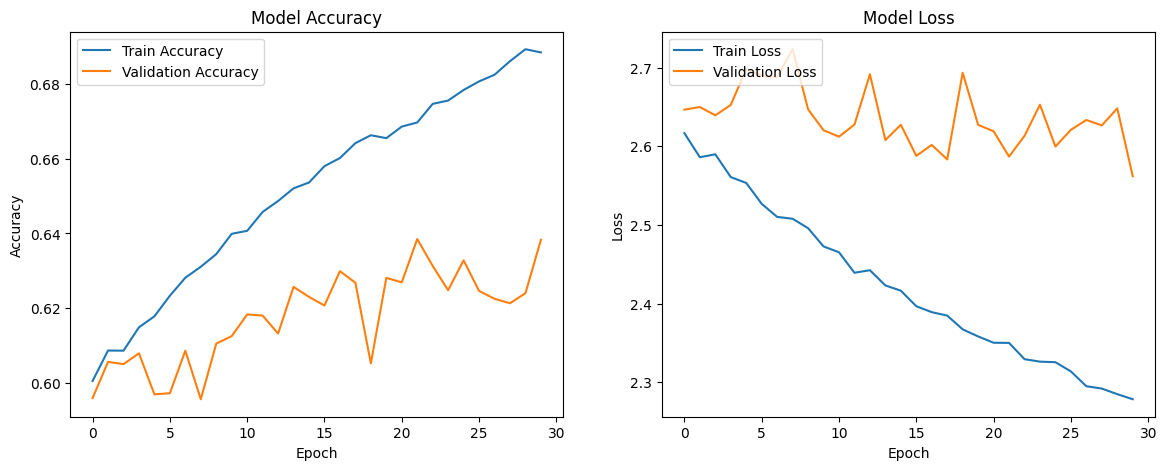

In [18]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()
